KELOMPOK D "PATO"(Pasukan Tempur Online)
Anggota :
1. Afsha Alifia Putri
2. Fiari Rahman
3. Meilisa Triana
4. Nazwa Nabila
5. Safinatunnajah
6. Stepanus Malo


# **C1. Data Preparation**

**C1.1.	Mencari missing value dan mengatasi masalah missing value, jika ada**

pada C1.1 ini kami melakukan 3 tahapan yang pertama perintah untuk membaca dataframenya, dengan menentukan format display.
kedua menghitung presentase missing value pada data frame yang kami gunakan
yang terakhir melakukan eksekusi untuk mengatasi missing value.

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# membaca data
url = 'https://raw.githubusercontent.com/Meilisa005/BMIData/refs/heads/main/DF_GREEN_GROWTH_MYS.A.csv'
data_oecd_Malaysia = pd.read_csv(url)

# Tampilkan hasilnya
display(data_oecd_Malaysia)

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,UNIT_MEASURE,Unit of measure,ACTIVITY,Economic activity,TIME_PERIOD,Time period,OBS_VALUE,Observation value,OBS_STATUS,Observation status,OBS_STATUS_2,Observation status 2,UNIT_MULT,Unit multiplier,PRICE_BASE,Price base,BASE_PER,Base period,TIMELINESS,Timeliness,DECIMALS,Decimals
0,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,MYS,Malaysia,A,Annual,SOCECO,Socio-economic context,_X,Unspecified,A,"Agriculture, forestry and fishing",2017,NaN,NaN,NaN,A,Normal value,NaN,NaN,0,Units,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,MYS,Malaysia,A,Annual,SOCECO,Socio-economic context,_X,Unspecified,A,"Agriculture, forestry and fishing",2016,NaN,NaN,NaN,A,Normal value,NaN,NaN,0,Units,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,MYS,Malaysia,A,Annual,SOCECO,Socio-economic context,_X,Unspecified,A,"Agriculture, forestry and fishing",2015,NaN,NaN,NaN,A,Normal value,NaN,NaN,0,Units,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,MYS,Malaysia,A,Annual,SOCECO,Socio-economic context,_X,Unspecified,A,"Agriculture, forestry and fishing",2014,NaN,NaN,NaN,A,Normal value,NaN,NaN,0,Units,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,MYS,Malaysia,A,Annual,SOCECO,Socio-economic context,_X,Unspecified,A,"Agriculture, forestry and fishing",2013,NaN,NaN,NaN,A,Normal value,NaN,NaN,0,Units,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,MYS,Malaysia,A,Annual,DRIN_SPOP,Population with access to improved drinking wa...,PT_POP,Percentage of population,_T,Total - all activities,2008,NaN,93.00,NaN,A,Normal value,NaN,NaN,0,Units,_Z,Not applicable,NaN,NaN,2.00,2 years lag,2.00,Two
2532,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,MYS,Malaysia,A,Annual,RE_TPES_EBIOM,Renewable energy supply (excluding solid biofu...,PT_SUP_NRG,Percentage of energy supply,_T,Total - all activities,2008,NaN,0.93,NaN,A,Normal value,NaN,NaN,0,Units,_Z,Not applicable,NaN,NaN,1.00,"1 year lag, timely",2.00,Two
2533,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,MYS,Malaysia,A,Annual,NRG_PROD,"Energy productivity, GDP per unit of TES",USD_TOE,US dollars per tonne of oil equivalent,_T,Total - all activities,2008,NaN,7417.82,NaN,A,Normal value,NaN,NaN,0,Units,Q,Constant prices,2015.00,NaN,1.00,"1 year lag, timely",2.00,Two
2534,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,MYS,Malaysia,A,Annual,ENVRESPROD,Environmental and resource productivity,_X,Unspecified,A,"Agriculture, forestry and fishing",2010,NaN,NaN,NaN,A,Normal value,NaN,NaN,0,Units,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


kode di atas hanyalah perinta untuk mengimpor library yang dibutuhkan, dan juga kode untuk format tampilan hasil dan perinta membaca data yang digunakan

In [ ]:
# Tampilkan jumlah data
print(f'Jumlah Data : {data_oecd_Malaysia.shape[0]} Baris\n')

# Hitung missing value
data_kosong = data_oecd_Malaysia.isna().sum().to_frame(name = 'Jumlah Missing Value').reset_index()
data_kosong['Persentase NULL %'] = 100 * (data_kosong['Jumlah Missing Value'] /data_oecd_Malaysia.shape[0]).round(4)

# Tampilkan hasilnya
data_kosong = data_kosong.style\
    .map(lambda val : 'background-color: red' if val > 50 else '', subset=['Persentase NULL %'])\
    .format({'Persentase NULL %': '{:.2f}'})

display(data_kosong)

Jumlah Data : 2536 Baris



,index,Jumlah Missing Value,Persentase NULL %
0,STRUCTURE,0,0.00
1,STRUCTURE_ID,0,0.00
2,STRUCTURE_NAME,0,0.00
3,ACTION,0,0.00
4,REF_AREA,0,0.00
5,Reference area,0,0.00
6,FREQ,0,0.00
7,Frequency of observation,0,0.00
8,MEASURE,0,0.00
9,Measure,0,0.00


**Interpretasi :** Kode diatas digunakan untuk menghitung presentase missing value pada data_oecd_Malaysia, dapat dilihat dari hasil yang ditampilkan bahwa lebih dari 40% dari 32 kolom pada data_oecd_Malaysia terdapat missing dan hampir saparuh dari kolom yang missing menunjukkan bahwa presentase missingnya di atas 85%. Sehingga dengan banyaknya missing kita perlu melakukkan tindakan agar data-data tersebut bisa diolah

In [ ]:

# Mengisi missing value dengan median untuk kolom numerik
for column in data_oecd_Malaysia.select_dtypes(include=[np.number]).columns:
    data_oecd_Malaysia[column].fillna(data_oecd_Malaysia[column].median(), inplace=True)

#kolom yang ingin dihapus
columns_to_drop = ['Time period', 'Measure', 'Observation status 2', 'Observation value',
                    'OBS_STATUS_2 ', 'OBS_STATUS_2', 'Decimals', 'Base period', 'Price base', 'Timeliness']

# Menghapus kolom yang ditentukan
data_dropped = data_oecd_Malaysia.drop(columns=columns_to_drop, errors='ignore')

# Menghitung jumlah dan persentase missing value
missing_values = data_dropped.isnull().sum()
percentage_null = (missing_values / len(data_dropped)) * 100

# Membuat DataFrame ringkasan
summary_df = pd.DataFrame({
    'Jumlah Missing Value': missing_values,
    'Persentase NULL %': percentage_null
})

data_dropped.to_csv('data_bersih.csv', index=False)
summary_df.to_csv('presentase.csv',index=False)
# Menampilkan hasil
display(summary_df)
print ('Data setelah dilakukan pengelolahan missing :')
display (data_dropped)


<ipython-input-3-b3c208647594>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_oecd_Malaysia[column].fillna(data_oecd_Malaysia[column].median(), inplace=True)


,Jumlah Missing Value,Persentase NULL %
STRUCTURE,0,0.00
STRUCTURE_ID,0,0.00
STRUCTURE_NAME,0,0.00
ACTION,0,0.00
REF_AREA,0,0.00
Reference area,0,0.00
FREQ,0,0.00
Frequency of observation,0,0.00
MEASURE,0,0.00
UNIT_MEASURE,0,0.00


Data setelah dilakukan pengelolahan missing :


,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,UNIT_MEASURE,Unit of measure,ACTIVITY,Economic activity,TIME_PERIOD,OBS_VALUE,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,PRICE_BASE,BASE_PER,TIMELINESS,DECIMALS
0,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,MYS,Malaysia,A,Annual,SOCECO,_X,Unspecified,A,"Agriculture, forestry and fishing",2017,9.68,A,Normal value,0,Units,NaN,2015.00,2.00,2.00
1,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,MYS,Malaysia,A,Annual,SOCECO,_X,Unspecified,A,"Agriculture, forestry and fishing",2016,9.68,A,Normal value,0,Units,NaN,2015.00,2.00,2.00
2,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,MYS,Malaysia,A,Annual,SOCECO,_X,Unspecified,A,"Agriculture, forestry and fishing",2015,9.68,A,Normal value,0,Units,NaN,2015.00,2.00,2.00
3,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,MYS,Malaysia,A,Annual,SOCECO,_X,Unspecified,A,"Agriculture, forestry and fishing",2014,9.68,A,Normal value,0,Units,NaN,2015.00,2.00,2.00
4,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,MYS,Malaysia,A,Annual,SOCECO,_X,Unspecified,A,"Agriculture, forestry and fishing",2013,9.68,A,Normal value,0,Units,NaN,2015.00,2.00,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,MYS,Malaysia,A,Annual,DRIN_SPOP,PT_POP,Percentage of population,_T,Total - all activities,2008,93.00,A,Normal value,0,Units,_Z,2015.00,2.00,2.00
2532,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,MYS,Malaysia,A,Annual,RE_TPES_EBIOM,PT_SUP_NRG,Percentage of energy supply,_T,Total - all activities,2008,0.93,A,Normal value,0,Units,_Z,2015.00,1.00,2.00
2533,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,MYS,Malaysia,A,Annual,NRG_PROD,USD_TOE,US dollars per tonne of oil equivalent,_T,Total - all activities,2008,7417.82,A,Normal value,0,Units,Q,2015.00,1.00,2.00
2534,DATAFLOW,OECD.ENV.EPI:DSD_GG@DF_GREEN_GROWTH(1.1),Green Growth,I,MYS,Malaysia,A,Annual,ENVRESPROD,_X,Unspecified,A,"Agriculture, forestry and fishing",2010,9.68,A,Normal value,0,Units,NaN,2015.00,2.00,2.00


**Interpretasi :** kode diatas digunakan untuk mengatasi missing value pada data_oecd_Malaysia. pertama mengisi nilai yang kosong dengan nilai median (nilai tengah) pada kolom numerik, selanjutnya menghapus kolom yang missing valuenya 100% dan juga menghapus beberapa kolom yang namanya hanya dibedakan pada penulisan huruf besar atau kecil saja. dan yang ditampilkan adalah presentase setiap kolom, dan semua data yang sudah dibersihkan, hasil  yang ditampilkan masih ada 1 data kosong namun hanya sekitar 36% dan pada kolom PRICE_BASE ini kolom kategorical.

**C1.2	Mencari duplicate valuedan menyelesaikanmasalah duplicate value,jika ada**

In [ ]:
#C1.2
# Mencari duplicate value
duplicates = data_oecd_Malaysia.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


**Interpretasi :** untuk mengatahui ada atau tidaknya duplicat pada data_oecd_Malaysia maka perlu memasukkan kode seperti yang sudah di tuliskan, setelah dilakukan pemerisaan terlihat tidak terdapat data yang duplikat atau 0, maka dapat di simpulkan bahwa data_eocd_Malaysia itu unik

**C1.3	Memeriksa outlier dan menangani outlier,jika ada**

In [ ]:
import pandas as pd
import numpy as np  # Make sure to import numpy

# Memeriksa dan menangani outlier dengan IQR hanya untuk kolom numerik
# Replace 'data' with 'data_oecd_Malaysia'
numerical_data = data_oecd_Malaysia.select_dtypes(include=[np.number])

# Menghitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga)
Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1

# Mengidentifikasi outlier (lebih dari 1.5 kali IQR dari batas bawah atau atas)
outliers = ((numerical_data < (Q1 - 1.5 * IQR)) | (numerical_data > (Q3 + 1.5 * IQR)))

print("Outliers detected in each column:\n", outliers.sum())

# Menghapus baris yang memiliki outlier
# Replace 'data' with 'data_oecd_Malaysia'
data_cleaned = data_oecd_Malaysia[~((numerical_data < (Q1 - 1.5 * IQR)) | (numerical_data > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Data setelah menghapus outliers:", data_cleaned.shape)

Outliers detected in each column:
 TIME_PERIOD               0
Time period               0
OBS_VALUE               398
Observation value         0
OBS_STATUS_2              0
Observation status 2      0
UNIT_MULT               108
BASE_PER                126
Base period               0
TIMELINESS               23
DECIMALS                  0
dtype: int64
Data setelah menghapus outliers: (2103, 32)


**Interpretasi** :
Kode di atas bertujuan untuk mendeteksi dan menghapus outlier dalam DataFrame `data_oecd_Malaysia` menggunakan metode Interquartile Range (IQR). Pertama, kolom-kolom numerik dipilih dan kuartil pertama (Q1) serta kuartil ketiga (Q3) dihitung untuk menentukan IQR. Outlier diidentifikasi sebagai nilai yang berada di luar batas Q1 - 1.5 * IQR dan Q3 + 1.5 * IQR. Hasil deteksi menunjukkan bahwa kolom 'OBS_VALUE' memiliki 398 outlier, dan kolom 'UNIT_MULT' serta 'BASE_PER' juga menunjukkan masing-masing 108 dan 126 outlier. Setelah proses pembersihan, baris yang mengandung outlier dihapus, sehingga jumlah baris yang tersisa dalam data bersih adalah 2103 dengan total 32 kolom. Ini menunjukkan bahwa outlier yang terdeteksi telah dihapus dari analisis untuk meningkatkan kualitas data yang akan digunakan.

**C1.4  Memeriksa imbalance data dan menyelesaikan masalah imbalance data,jika ada.**

Distribusi kelas:
MEASURE
NRG              138
ENVRESPROD       138
NRGC             105
SOCECO            92
ECO               92
                ... 
SW_NOTTOPERM       1
SW_SEASWAT         1
SW_SEASTOPERM      1
SW_PERMTONOT       1
SW_PERMWAT         1
Name: count, Length: 99, dtype: int64


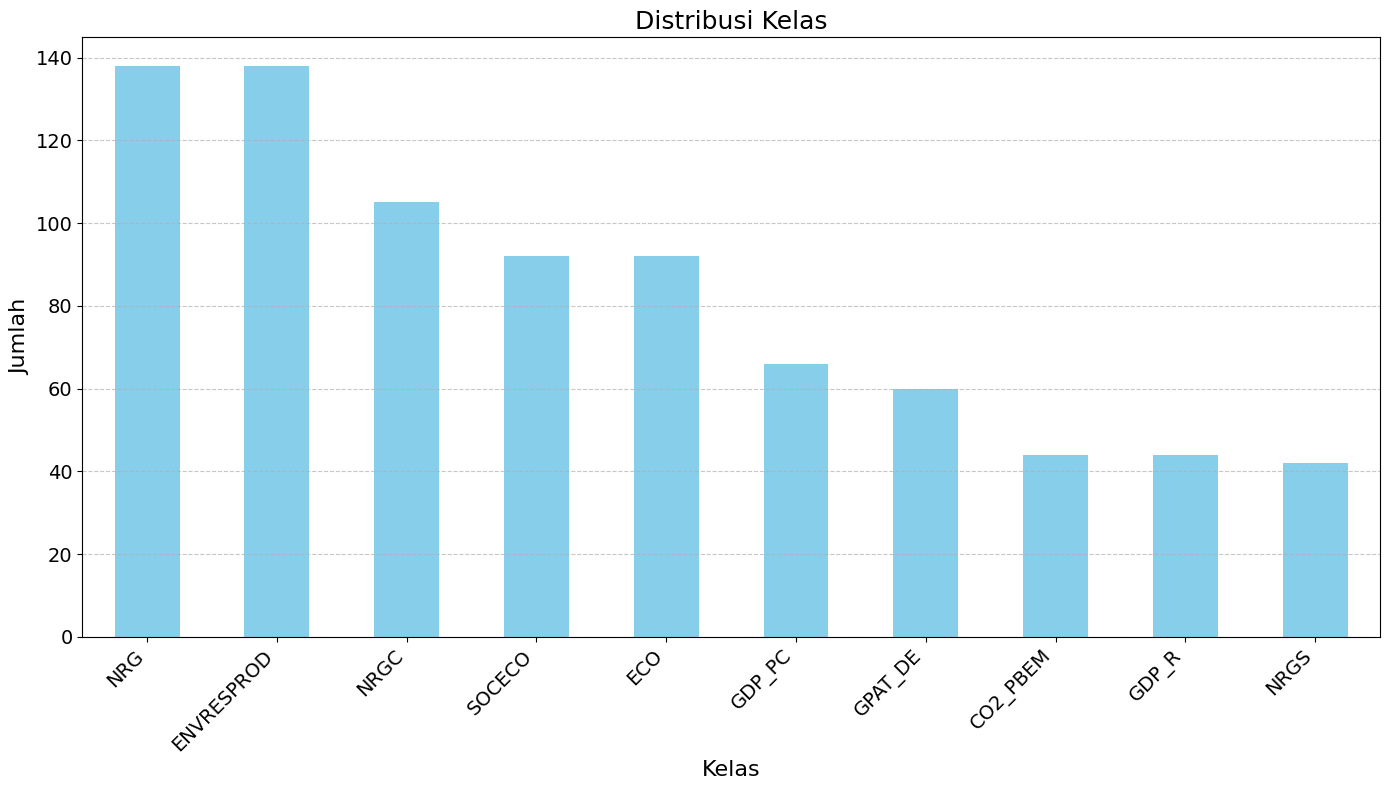

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df =pd.read_csv('data_bersih.csv')
# Mengecek distribusi kelas
class_distribution = df['MEASURE'].value_counts()

# Menampilkan distribusi kelas
print("Distribusi kelas:")
print(class_distribution)

# Mengambil beberapa data teratas (misal, 10 teratas)
top_n = 10  # Anda bisa mengubah nilai ini sesuai kebutuhan
class_distribution_top = class_distribution.head(top_n)

# Visualisasi distribusi kelas
plt.figure(figsize=(14, 8))  # Mengatur ukuran grafik menjadi lebih besar
class_distribution_top.plot(kind='bar', color='skyblue')  # Mengubah warna bar menjadi lebih menarik
plt.title('Distribusi Kelas', fontsize=18)  # Mengubah ukuran font judul
plt.xlabel('Kelas', fontsize=16)  # Mengubah ukuran font label sumbu x
plt.ylabel('Jumlah', fontsize=16)  # Mengubah ukuran font label sumbu y
plt.xticks(rotation=45, ha='right', fontsize=14)  # Memutar label sumbu x
plt.yticks(fontsize=14)  # Mengubah ukuran font label sumbu y
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Menambahkan grid untuk kemudahan pembacaan

plt.tight_layout()  # Menyesuaikan layout agar tidak terpotong
plt.show()


**Interpretasi** : Kode diatas mengecek distribusi kelas pada data_oecd_Malaysia kolom 'MEASURE'. Distribusi ini dihitung menggunakan `value_counts()` untuk melihat frekuensi setiap kelas, kemudian ditampilkan di konsol. Dari distribusi tersebut, 10 kelas teratas dipilih untuk divisualisasikan dalam bentuk diagram batang. Grafik tersebut dibuat menggunakan `matplotlib`, dengan ukuran grafik yang diperbesar, warna batang yang menarik (skyblue), dan beberapa pengaturan estetika seperti rotasi label sumbu x, grid pada sumbu y, serta penyesuaian tata letak agar grafik terlihat rapi. Distribusi kelas yang ditampilkan mengindikasikan bahwa kelas 'NRG' dan 'ENVRESPROD' memiliki frekuensi tertinggi (138), sedangkan beberapa kelas lainnya hanya muncul sekali.

**C1.5 Melakukan feature encoding, jika diperlukan**

In [ ]:
# C1.5 Melakukan feature encoding jika diperlukan
# Menggunakan one-hot encoding untuk kolom kategoris
data_encoded = pd.get_dummies(data_cleaned, drop_first=True)

# Menghitung jumlah missing value dan persentase NULL
jumlah_missing = data_encoded.isnull().sum()
persentase_null = (jumlah_missing / len(data_encoded)) * 100

# Membuat DataFrame baru untuk menampilkan informasi tersebut
missing_info = pd.DataFrame({
    'Jumlah Missing Value': jumlah_missing,
    'Persentase NULL %': persentase_null
}).reset_index()

# Menampilkan 5 baris pertama dari DataFrame baru
print("Data setelah encoding:\n", missing_info.head())

Data setelah encoding:
                index  Jumlah Missing Value  Persentase NULL %
0        TIME_PERIOD                     0               0.00
1        Time period                  2103             100.00
2          OBS_VALUE                     0               0.00
3  Observation value                  2103             100.00
4       OBS_STATUS_2                  2103             100.00


In [ ]:
# C1.5 Melakukan feature encoding jika diperlukan
# Menggunakan one-hot encoding untuk kolom kategoris
data_encoded = pd.get_dummies(data_cleaned, drop_first=True)

# Menghitung jumlah missing value dan persentase NULL
jumlah_missing = data_encoded.isnull().sum()
persentase_null = (jumlah_missing / len(data_encoded)) * 100

# Membuat DataFrame baru untuk menampilkan informasi tersebut
missing_info = pd.DataFrame({
    'Jumlah Missing Value': jumlah_missing,
    'Persentase NULL %': persentase_null
}).reset_index()

# Menampilkan 5 baris pertama dari DataFrame baru
print("Data setelah encoding:\n", missing_info.head())


Data setelah encoding:
                index  Jumlah Missing Value  Persentase NULL %
0        TIME_PERIOD                     0               0.00
1        Time period                  2103             100.00
2          OBS_VALUE                     0               0.00
3  Observation value                  2103             100.00
4       OBS_STATUS_2                  2103             100.00


**Interpretasi** : Kode di atas melakukan one-hot encoding pada DataFrame `data_cleaned` dan menghitung jumlah nilai yang hilang (missing value) serta persentase nilai NULL untuk setiap kolom. Setelah encoding, kolom-kolom yang dihitung menunjukkan bahwa kolom 'TIME_PERIOD' dan 'OBS_VALUE' tidak memiliki nilai yang hilang, sedangkan kolom 'Time period', 'Observation value', dan 'OBS_STATUS_2' masing-masing memiliki 2103 missing value, yang berarti 100% dari nilai di kolom tersebut hilang. Hasil ini menunjukkan bahwa kolom-kolom dengan persentase NULL tinggi kemungkinan tidak akan memberikan informasi yang berguna untuk analisis lebih lanjut, sehingga perlu dipertimbangkan tindakan untuk mengatasi nilai yang hilang, seperti penghapusan atau pengisian.

# **C2. Statistics for Data Science & Exploring Data Analysis (EDA)**

**C2.1 Mengolaborasi features dan tipe data (nominal, numerik, dan ordinal)**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as py

# Membaca file CSV
data = pd.read_csv('/content/data_bersih (1).csv')

 Kode ini digunakan untuk mengidentifikasi dan mengelompokkan kolom dalam dataset berdasarkan jenis datanya, yaitu nominal (kategorikal), numerik, dan ordinal, sehingga memudahkan dalam pemilihan metode analisis atau pemrosesan yang sesuai untuk setiap jenis fitur.


In [ ]:
# Memeriksa tipe data setiap kolom
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
nominal_features = df.select_dtypes(include=['object']).columns.tolist()

# Biasanya fitur ordinal harus ditentukan secara manual
ordinal_features = []  # Tidak ada fitur ordinal dalam kasus ini

# Menampilkan hasil
print("Fitur Numerik:", numerical_features)
print("Fitur Nominal:", nominal_features)
print("Fitur Ordinal:", ordinal_features)

Fitur Numerik: ['TIME_PERIOD', 'OBS_VALUE', 'UNIT_MULT', 'BASE_PER', 'TIMELINESS', 'DECIMALS']
Fitur Nominal: ['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'REF_AREA', 'Reference area', 'FREQ', 'Frequency of observation', 'MEASURE', 'UNIT_MEASURE', 'Unit of measure', 'ACTIVITY', 'Economic activity', 'OBS_STATUS', 'Observation status', 'Unit multiplier', 'PRICE_BASE']
Fitur Ordinal: []


***Interpretasi hasil:***

Berdasarkan hasil yang ditampilkan, dataset hanya berisi fitur numerik, yaitu 'tahun' dan 'pertumbuhan_ekonomi'. Tidak ada fitur nominal atau kategorikal yang terdeteksi, sehingga daftar fitur nominal kosong. Ini menunjukkan bahwa seluruh fitur dalam dataset memiliki tipe data numerik (baik integer atau float), yang umumnya digunakan untuk analisis kuantitatif. Selain itu, tidak ada fitur ordinal yang teridentifikasi, yang berarti tidak ada variabel yang memiliki urutan atau tingkatan tertentu.



**C2.2 Menjelaskan kondisi dan perbedaan penggunaan mean, median, dan modus**

Kode ini digunakan untuk menghitung dan menampilkan nilai Mean (Rata-rata), Median, dan Modus untuk beberapa kolom numerik dalam dataset.

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

data = pd.DataFrame({
    'tahun': [2015, 2016, 2017, 2018, 2019, 2020, 2021],
    'pertumbuhan_ekonomi': [4.5, 4.2, 5.0, 4.9, 4.7, -5.6, 3.1]
})

# Menghitung Mean (Rata-rata)
mean_value = data['pertumbuhan_ekonomi'].mean()

# Menghitung Median (Nilai Tengah)
median_value = data['pertumbuhan_ekonomi'].median()

# Menghitung Modus (Nilai Paling Sering Muncul)
mode_value = stats.mode(data['pertumbuhan_ekonomi'], keepdims=True).mode[0]

# Menampilkan Hasil
print(f"Mean (Rata-rata Pertumbuhan Ekonomi): {mean_value}")
print(f"Median (Nilai Tengah Pertumbuhan Ekonomi): {median_value}")
print(f"Modus (Nilai Paling Sering Muncul dalam Pertumbuhan Ekonomi): {mode_value}")



Mean (Rata-rata Pertumbuhan Ekonomi): 2.971428571428572
Median (Nilai Tengah Pertumbuhan Ekonomi): 4.5
Modus (Nilai Paling Sering Muncul dalam Pertumbuhan Ekonomi): -5.6


***Interpretasi hasil:***  
Berdasarkan hasil statistik deskriptif, rata-rata pertumbuhan ekonomi adalah 2.97, menunjukkan bahwa secara keseluruhan, pertumbuhan ekonomi cenderung positif. Namun, nilai tengah (median) sebesar 4.5 lebih tinggi dari rata-rata, yang mengindikasikan adanya beberapa nilai yang lebih rendah (mungkin negatif) yang menarik rata-rata turun. Hal ini diperkuat oleh modus -5.6, yang menunjukkan bahwa nilai negatif ini sering muncul dalam data. Secara keseluruhan, meskipun pertumbuhan ekonomi secara umum positif, terdapat indikasi adanya periode-periode dengan penurunan atau kontraksi ekonomi yang signifikan.





**C2.3 Menemukan dan mendeskripsikan statistical five summaries**

Kode ini digunakan untuk menghasilkan Five-number summary dari beberapa kolom numerik dalam dataset, yang berfungsi untuk memberikan gambaran statistik dasar tentang distribusi data.

In [ ]:
import pandas as pd

data = pd.DataFrame({
    'pertumbuhan_ekonomi': [4.5, 4.2, 5.0, 4.9, 4.7, -5.6, 3.1]
})

# Menghitung Minimum
minimum_value = data['pertumbuhan_ekonomi'].min()

# Menghitung Kuartil Pertama (Q1)
q1_value = data['pertumbuhan_ekonomi'].quantile(0.25)

# Menghitung Median (Q2)
median_value = data['pertumbuhan_ekonomi'].median()

# Menghitung Kuartil Ketiga (Q3)
q3_value = data['pertumbuhan_ekonomi'].quantile(0.75)

# Menghitung Maksimum
maximum_value = data['pertumbuhan_ekonomi'].max()

# Menampilkan ringkasan lima nilai
print("Statistical Five Summaries:")
print(f"Minimum: {minimum_value}")
print(f"Kuartil Pertama (Q1): {q1_value}")
print(f"Median: {median_value}")
print(f"Kuartil Ketiga (Q3): {q3_value}")
print(f"Maksimum: {maximum_value}")


Statistical Five Summaries:
Minimum: -5.6
Kuartil Pertama (Q1): 3.6500000000000004
Median: 4.5
Kuartil Ketiga (Q3): 4.800000000000001
Maksimum: 5.0


***Interpretasi hasil:***

Berdasarkan statistik lima nilai ringkasan, rentang pertumbuhan ekonomi terlihat jelas. Nilai minimum -5.6 menunjukkan adanya periode dengan kontraksi ekonomi yang signifikan. Kuartil pertama (Q1) sebesar 3.65 dan kuartil ketiga (Q3) sebesar 4.8 menunjukkan bahwa 50% dari data pertumbuhan ekonomi berada di antara 3.65 dan 4.8, dengan median 4.5 yang berarti setengah dari data berada di bawah dan setengahnya lagi di atas angka tersebut. Maksimum 5.0 menunjukkan bahwa pertumbuhan ekonomi terbaik yang tercatat adalah 5.0. Secara keseluruhan, sebagian besar data pertumbuhan ekonomi berada dalam kisaran positif yang relatif sempit, meskipun terdapat outlier negatif yang cukup ekstrem (nilai minimum).



**C2.4 Mendeskripsikan distribusi data**


Kode ini digunakan untuk menganalisis distribusi data pada kolom-kolom numerik dalam dataset dan memberikan gambaran statistik serta visualisasi terkait distribusi setiap fitur.

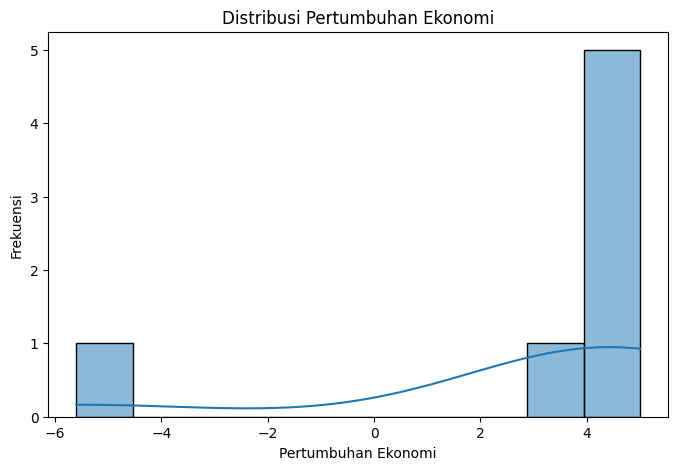

Skewness (Kemiringan): -2.5009490102041156
Kurtosis (Puncak Distribusi): 6.371587398516535


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Data yang digunakan
data = pd.DataFrame({
    'tahun': [2015, 2016, 2017, 2018, 2019, 2020, 2021],
    'pertumbuhan_ekonomi': [4.5, 4.2, 5.0, 4.9, 4.7, -5.6, 3.1]
})

# 1. Plot Histogram untuk Visualisasi Distribusi
plt.figure(figsize=(8, 5))
sns.histplot(data['pertumbuhan_ekonomi'], bins=10, kde=True)
plt.title('Distribusi Pertumbuhan Ekonomi')
plt.xlabel('Pertumbuhan Ekonomi')
plt.ylabel('Frekuensi')
plt.show()

# 2. Menghitung Skewness dan Kurtosis
skewness = data['pertumbuhan_ekonomi'].skew()
kurtosis = data['pertumbuhan_ekonomi'].kurt()

print(f"Skewness (Kemiringan): {skewness}")
print(f"Kurtosis (Puncak Distribusi): {kurtosis}")

***Interpretasi hasil***:

Dari histogram distribusi pertumbuhan ekonomi yang ditampilkan, terlihat bahwa distribusi data sangat tidak simetris dengan kemiringan (skewness) sebesar -2.5, yang menandakan adanya skew negatif atau miring ke kiri. Ini berarti sebagian besar data berada di sisi kanan (pertumbuhan positif), namun ada beberapa nilai yang sangat rendah di sisi kiri (pertumbuhan negatif), seperti yang terlihat dari baris pertama di histogram yang mewakili nilai ekstrem (sekitar -5.6). Selain itu, kurtosis sebesar 6.37 menunjukkan bahwa distribusi ini memiliki puncak yang tajam dan ekor yang panjang, mengindikasikan adanya beberapa outlier signifikan yang jauh dari rata-rata. Ini mengonfirmasi adanya periode ekonomi yang mengalami kontraksi yang sangat kuat dibandingkan dengan mayoritas periode pertumbuhan.



**C2.5 Hitunglah korelasi antar-fitur**


Kode ini digunakan untuk menganalisis hubungan (korelasi) antara fitur numerik dalam dataset dan memvisualisasikan hubungan tersebut menggunakan heatmap.

Matriks Korelasi:
                     tahun  pertumbuhan_ekonomi
tahun                 1.00                -0.49
pertumbuhan_ekonomi  -0.49                 1.00


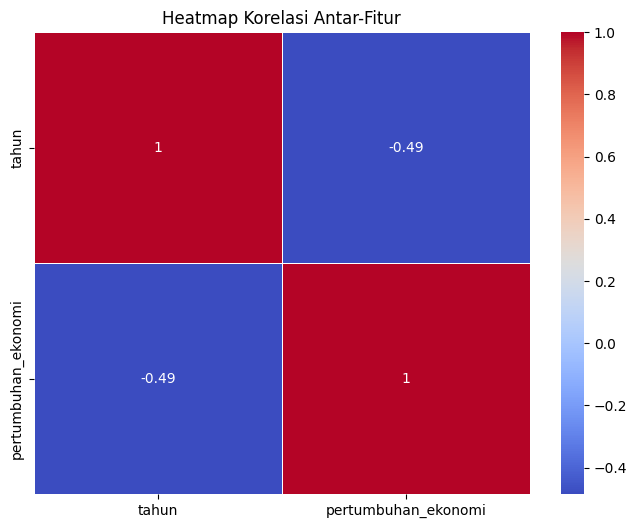

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data yang digunakan
data = pd.DataFrame({
    'tahun': [2015, 2016, 2017, 2018, 2019, 2020, 2021],
    'pertumbuhan_ekonomi': [4.5, 4.2, 5.0, 4.9, 4.7, -5.6, 3.1]
})

# 1. Menghitung matriks korelasi menggunakan metode Pearson
correlation_matrix = data.corr(method='pearson')

# 2. Menampilkan matriks korelasi
print("Matriks Korelasi:")
print(correlation_matrix)

# 3. Visualisasi korelasi dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar-Fitur')
plt.show()


***Interpretasi hasil***:

Heatmap korelasi di atas menunjukkan hubungan antara dua variabel: tahun dan pertumbuhan ekonomi. Nilai 1 di diagonal menunjukkan bahwa setiap variabel memiliki korelasi sempurna dengan dirinya sendiri. Di luar diagonal, terdapat nilai -0,49 yang menunjukkan korelasi negatif antara tahun dan pertumbuhan ekonomi, yang berarti bahwa seiring bertambahnya tahun, pertumbuhan ekonomi cenderung menurun. Korelasi negatif ini bisa menunjukkan bahwa faktor lain mungkin mempengaruhi pertumbuhan ekonomi secara negatif seiring berjalannya waktu. Interpretasi ini memerlukan analisis lebih lanjut untuk memahami penyebab dan implikasi dari hubungan tersebut. ​





# C3. Feture Engineering

Menggunakan dataset yang sama, silahkan untuk membuat minimal 2 fitur baru yang relevan dan signifikan untuk dapat membantu memecahkan masalah sesuai dataset yang dipilih

In [ ]:
!pip install ipywidgets

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


Kode ini berfungsi untuk menambahkan widgets seperti scroll button yang saya gunakan dalam salah satu fitur saya

In [ ]:
import pandas as pd

data = pd.read_csv("/content/data_bersih (1).csv")

Kode ini berfungsi untuk menginputkan dataframenya

In [ ]:
# Melihat semua jenis 'MEASURE' yang ada
print(data['MEASURE'].unique())


['SOCECO' 'LTAX' 'ENGTAX' 'TECHPAT_PAT' 'GHG' 'PPP' 'ECO' 'O3_MOR'
 'NATBASE' 'POP_Y15T64' 'FOR_LTMGMT' 'FOR' 'GDP_PC' 'SOC' 'FIT_WIND'
 'PM_SPEX10' 'ENVTAXTRANS' 'NRG' 'NRGC' 'FPRICE_DIE' 'ENVQOL' 'FPRICE_PET'
 'ENVRESPROD' 'O3_SC' 'DMC_MIN' 'REGMNG' 'SANI_SPOP' 'GPAT_DE' 'XR'
 'GDP_R' 'FOR_IF_PCLOSS2000' 'RE_TPES' 'PM_SC' 'RE_NRG' 'ECOPOL'
 'POP_LIFEEXP' 'PM_SPEX35' 'RN_SC' 'GDP_RCAP' 'GHG_PBEM' 'CO2_PBPROD'
 'CO2_PBEMCAP' 'GHG_DBEM' 'NRG_INT' 'EPRICE_IND' 'LAND' 'CO2_DBPROD'
 'POP_Y_LT14' 'DEF' 'ENVTAX' 'POP_F' 'NRGS' 'CO2_DBEM' 'RN_MOR'
 'GHG_PBEMCAP' 'GHG_DBPROD' 'PM_MOR' 'EPRICE_RES' 'GHG_DBEMCAP' 'DMC_PROD'
 'FOR_STOCK' 'WLIFE' 'POP_FERTILITY' 'RENV' 'CO2_PBEM' 'CO2_AIRTRAGDP'
 'FOR_NAT' 'FOR_IF_EXTENT' 'PB_SC' 'CO2_DBEMCAP' 'MAT' 'WATER' 'POPDEN'
 'PM_PWM' 'CO2_AIRTRACAP' 'POP_NETMIGR' 'DMC_BIO' 'EGS' 'FIT_SOLAR' 'HCLI'
 'IFF_ODA' 'TECHPAT_RD' 'DMC_MET' 'GPAT_DE_RTA' 'ASEW' 'PB_MOR'
 'GHG_PBPROD' 'POP_Y_GT65' 'EAMFP' 'DRIN_SPOP' 'RE_TPES_EBIOM' 'NRG_PROD'
 'ENVTAX_VEH' 'SW_PERM

Hasil yang didapat dari menggunakan kode ini ialah kita mengetahui isi dari kolom measure pada dataframe yang digunakan.

## Dictionary

In [ ]:
import pandas as pd

# Mengimpor data
data = pd.read_csv('data_bersih (1).csv')  # Ganti dengan path yang sesuai jika diperlukan

# Kamus lengkap untuk mengonversi singkatan pengukuran menjadi lebih deskriptif
measurement_dict = {
    'SOCECO': 'Sosial dan Ekonomi',
    'LTAX': 'Pajak Tanah',
    'ENGTAX': 'Pajak Energi',
    'TECHPAT_PAT': 'Paten Teknologi',
    'GHG': 'Emisi Gas Rumah Kaca',
    'PPP': 'Keseimbangan Daya Beli',
    'ECO': 'Ekonomi',
    'O3_MOR': 'Kematian Akibat Paparan Ozon',
    'NATBASE': 'Sumber Daya Alam',
    'POP_Y15T64': 'Populasi Usia 15-64',
    'FOR_LTMGMT': 'Pengelolaan Jangka Panjang Hutan',
    'FOR': 'Kehutanan',
    'GDP_PC': 'Produk Domestik Bruto per Kapita',
    'SOC': 'Indeks Sosial',
    'FIT_WIND': 'Energi Angin Terpasang',
    'PM_SPEX10': 'Partikel Materi Udara di Bawah 10 µm',
    'ENVTAXTRANS': 'Pajak Lingkungan di Sektor Transportasi',
    'NRG': 'Energi',
    'NRGC': 'Konsumsi Energi',
    'FPRICE_DIE': 'Harga Bahan Bakar Diesel',
    'ENVQOL': 'Kualitas Lingkungan dan Kehidupan',
    'FPRICE_PET': 'Harga Bahan Bakar Bensin',
    'ENVRESPROD': 'Produk Ramah Lingkungan',
    'O3_SC': 'Paparan Ozon Terkait Dampak Kesehatan',
    'DMC_MIN': 'Konsumsi Material Domestik untuk Mineral',
    'REGMNG': 'Pengelolaan Wilayah',
    'SANI_SPOP': 'Populasi dengan Akses Sanitasi',
    'GPAT_DE': 'Paten Hijau di Jerman',
    'XR': 'Kurs Tukar',
    'GDP_R': 'Produk Domestik Bruto Nyata',
    'FOR_IF_PCLOSS2000': 'Kehilangan Hutan Primer sejak 2000',
    'RE_TPES': 'Total Pasokan Energi Terbarukan',
    'PM_SC': 'Partikel Materi Udara dan Dampak Kesehatan',
    'RE_NRG': 'Energi Terbarukan',
    'ECOPOL': 'Kebijakan Ekonomi',
    'POP_LIFEEXP': 'Harapan Hidup Populasi',
    'PM_SPEX35': 'Partikel Materi Udara di Bawah 3.5 µm',
    'RN_SC': 'Paparan Radon Terkait Dampak Kesehatan',
    'GDP_RCAP': 'Produk Domestik Bruto Nyata per Kapita',
    'GHG_PBEM': 'Emisi Gas Rumah Kaca per Basis Ekonomi',
    'CO2_PBPROD': 'Emisi CO2 dari Produksi',
    'CO2_PBEMCAP': 'Emisi CO2 per Kapita dari Basis Ekonomi',
    'GHG_DBEM': 'Emisi Gas Rumah Kaca dari Basis Domestik',
    'NRG_INT': 'Intensitas Energi',
    'EPRICE_IND': 'Harga Energi Industri',
    'LAND': 'Penggunaan Lahan',
    'CO2_DBPROD': 'Emisi CO2 dari Produksi Domestik',
    'POP_Y_LT14': 'Populasi Usia di Bawah 14 Tahun',
    'DEF': 'Deforestasi',
    'ENVTAX': 'Pajak Lingkungan',
    'POP_F': 'Populasi Perempuan',
    'NRGS': 'Pasokan Energi',
    'CO2_DBEM': 'Emisi CO2 dari Basis Domestik',
    'RN_MOR': 'Kematian Terkait Paparan Radon',
    'GHG_PBEMCAP': 'Emisi Gas Rumah Kaca per Kapita dari Basis Ekonomi',
    'GHG_DBPROD': 'Emisi Gas Rumah Kaca dari Produksi Domestik',
    'PM_MOR': 'Kematian Akibat Paparan Partikel Materi Udara',
    'EPRICE_RES': 'Harga Energi untuk Rumah Tangga',
    'GHG_DBEMCAP': 'Emisi Gas Rumah Kaca per Kapita dari Basis Domestik',
    'DMC_PROD': 'Konsumsi Material Domestik untuk Produksi',
    'FOR_STOCK': 'Stok Hutan',
    'WLIFE': 'Kehidupan Liar',
    'POP_FERTILITY': 'Tingkat Kesuburan Populasi',
    'RENV': 'Kualitas Lingkungan yang Diperbarui',
    'CO2_PBEM': 'Emisi CO2 dari Basis Ekonomi',
    'CO2_AIRTRAGDP': 'Emisi CO2 dari Transportasi Udara terhadap GDP',
    'FOR_NAT': 'Hutan Alami',
    'FOR_IF_EXTENT': 'Luas Hutan Primer',
    'PB_SC': 'Polusi Udara dan Dampak Kesehatan',
    'CO2_DBEMCAP': 'Emisi CO2 per Kapita dari Basis Domestik',
    'MAT': 'Material',
    'WATER': 'Sumber Daya Air',
    'POPDEN': 'Kepadatan Penduduk',
    'PM_PWM': 'Paparan Partikel Materi Udara per Meter Persegi',
    'CO2_AIRTRACAP': 'Emisi CO2 dari Transportasi Udara per Kapita',
    'POP_NETMIGR': 'Migrasi Bersih Populasi',
    'DMC_BIO': 'Konsumsi Material Domestik untuk Bahan Organik',
    'EGS': 'Ekonomi Hijau',
    'FIT_SOLAR': 'Energi Surya Terpasang',
    'HCLI': 'Perubahan Iklim',
    'IFF_ODA': 'Aliran Keuangan Internasional untuk Bantuan Pembangunan',
    'TECHPAT_RD': 'Paten Teknologi untuk Penelitian dan Pengembangan',
    'DMC_MET': 'Konsumsi Material Domestik untuk Logam',
    'GPAT_DE_RTA': 'Paten Hijau di Jerman - RTA',
    'ASEW': 'Kesejahteraan Ekonomi Lestari',
    'PB_MOR': 'Kematian Akibat Polusi Udara',
    'GHG_PBPROD': 'Emisi Gas Rumah Kaca dari Produksi',
    'POP_Y_GT65': 'Populasi Usia di Atas 65 Tahun',
    'EAMFP': 'Produktivitas Multi-Faktor yang Ditingkatkan Lingkungan',
    'DRIN_SPOP': 'Populasi dengan Akses Air Minum',
    'RE_TPES_EBIOM': 'Pasokan Energi Biomassa Terbarukan',
    'NRG_PROD': 'Produksi Energi',
    'ENVTAX_VEH': 'Pajak Lingkungan pada Kendaraan',
    'SW_PERMTOSEAS': 'Air Tanah dari Permanen ke Musiman',
    'SW_NOTTOPERM': 'Air Tanah dari Tidak Permanen ke Permanen',
    'SW_SEASWAT': 'Air Tanah Musiman',
    'SW_SEASTOPERM': 'Air Tanah Musiman ke Permanen',
    'SW_PERMTONOT': 'Air Tanah Permanen ke Tidak Permanen',
    'SW_PERMWAT': 'Air Tanah Permanen'
}

# Menambahkan deskripsi ke DataFrame
data['MEASURE_DESC'] = data['MEASURE'].map(measurement_dict).fillna(data['MEASURE'])

# Menampilkan data dengan kolom pengukuran yang lebih deskriptif
display(data[['MEASURE', 'MEASURE_DESC']].drop_duplicates())


,MEASURE,MEASURE_DESC
0,SOCECO,Sosial dan Ekonomi
22,LTAX,Pajak Tanah
42,ENGTAX,Pajak Energi
62,TECHPAT_PAT,Paten Teknologi
84,GHG,Emisi Gas Rumah Kaca
...,...,...
2442,SW_NOTTOPERM,Air Tanah dari Tidak Permanen ke Permanen
2456,SW_SEASWAT,Air Tanah Musiman
2457,SW_SEASTOPERM,Air Tanah Musiman ke Permanen
2477,SW_PERMTONOT,Air Tanah Permanen ke Tidak Permanen


Kode ini kami gunakan untuk menambahkan kolom baru berupa measure_desc, kolom ini berisi kepanjangan/penjelasan dari isi kolom measure dimana sebagai contoh disini ditambahkan Bahwa SOCECO merupakan data berisi pengukuran Sosial dan Ekonomi. Kami menambahkan data ini karena ini akan memudahkan user dalam menggunakan salah satu fitur yang kami buat.

## C3.1 Fitur

1. Fitur Mengukur perubahan kinerja lingkungan dari tahun ke tahun berdasarkan data yang ada

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

def hitung_perubahan_pengukuran(data, pengukuran_input):
    # Filter data berdasarkan pengukuran yang dipilih
    data_pengukuran = data[data['MEASURE_DESC'] == pengukuran_input]

    # Urutkan data berdasarkan periode waktu dan hitung perubahan
    data_pengukuran = data_pengukuran.sort_values(by='TIME_PERIOD')
    data_pengukuran['Perubahan Nilai'] = data_pengukuran['OBS_VALUE'].diff().fillna(0)

    # Ubah nama kolom menjadi lebih deskriptif
    data_pengukuran = data_pengukuran.rename(columns={
        'TIME_PERIOD': 'Tahun',
        'MEASURE': 'Pengukuran',
        'OBS_VALUE': 'Nilai Observasi',
        'Perubahan Nilai': 'Perubahan Nilai'
    })

    return data_pengukuran

# Membuat dropdown menu untuk memilih pengukuran dengan deskripsi
pengukuran_options = data['MEASURE_DESC'].unique()  # Menggunakan MEASURE_DESC
pengukuran_dropdown = widgets.Dropdown(
    options=pengukuran_options,
    description='Pengukuran:',
    disabled=False,
)

# Fungsi untuk menampilkan hasil setelah pilihan dibuat
def on_pengukuran_change(change):
    pengukuran_input = change['new']

    # Hapus hasil sebelumnya
    clear_output(wait=True)

    # Tampilkan dropdown kembali
    display(pengukuran_dropdown)

    # Hitung dan tampilkan hasil perubahan pengukuran
    pengukuran_df = hitung_perubahan_pengukuran(data, pengukuran_input)
    print(f"\nPerubahan untuk: {pengukuran_input} dari tahun ke tahun:")
    print(pengukuran_df[['Tahun', 'Pengukuran', 'Nilai Observasi', 'Perubahan Nilai']])

# Menampilkan dropdown dan memantau perubahan pilihan
pengukuran_dropdown.observe(on_pengukuran_change, names='value')
display(pengukuran_dropdown)


Dropdown(description='Pengukuran:', options=('Sosial dan Ekonomi', 'Pajak Tanah', 'Pajak Energi', 'Paten Tekno…

Hasil dari code ini ialah agar memudahkan user untuk mengetahui presentase perubahan suatu pegukuran setiap tahun nya, Contoh pada tahun 2000 presentase pengukuran sosial dan ekonomi sekian persen, nanti akan muncul presentase pengukuran pada tahun tahun berikutnya yang juga menambahkan perubahan nilai pegukuran (apakah nilai presentasenya naik atau turun).

2. Fitur pengamatan tentang perkembangan ekonomi dari tahun ke tahun di Malaysia

In [ ]:
import pandas as pd

# Mengatur tampilan agar menampilkan semua kolom dan format angka dengan 2 desimal
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Memuat dataset
file_path = '/content/data_bersih (1).csv'
dataset = pd.read_csv(file_path)

# Mengurutkan dataset berdasarkan negara (REF_AREA) dan waktu (TIME_PERIOD)
dataset_sorted = dataset.sort_values(by=['REF_AREA', 'TIME_PERIOD'])

# 1. Menghitung Pertumbuhan Tahunan dari Nilai Pengamatan (Year-on-Year Growth)
# Menghitung persentase perubahan tahunan untuk kolom OBS_VALUE
dataset_sorted['Year_on_Year_Growth'] = dataset_sorted.groupby('REF_AREA')['OBS_VALUE'].pct_change() * 100

# 2. Kategori Nilai Pengamatan Berdasarkan Ambang Batas (Observation Value Category)
# Mendefinisikan ambang batas untuk kategori berdasarkan persentil dari kolom OBS_VALUE
low_threshold = dataset_sorted['OBS_VALUE'].quantile(0.25)
high_threshold = dataset_sorted['OBS_VALUE'].quantile(0.75)

# Fungsi untuk mengkategorikan nilai pengamatan
def categorize_obs_value(value):
    if value < low_threshold:
        return 'Rendah'
    elif value > high_threshold:
        return 'Tinggi'
    else:
        return 'Sedang'

# Terapkan fungsi kategorisasi ke kolom OBS_VALUE
dataset_sorted['OBS_Value_Category'] = dataset_sorted['OBS_VALUE'].apply(categorize_obs_value)

# Mengubah nama kolom agar lebih mudah dipahami
dataset_sorted = dataset_sorted.rename(columns={
    'TIME_PERIOD': 'Periode_Waktu',
    'REF_AREA': 'Wilayah',
    'OBS_VALUE': 'Nilai_Observasi',
    'Year_on_Year_Growth': 'Pertumbuhan_Tahun_ke_Tahun',
    'OBS_Value_Category': 'Kategori_Nilai_Observasi'
})

# Menampilkan 20 baris pertama dari dataset yang telah diurutkan dengan nama kolom yang diperbarui
display("Menampilkan 20 baris pertama dari dataset yang telah diurutkan dengan nama kolom yang diperbarui:")
display(dataset_sorted[['Periode_Waktu', 'Wilayah', 'Nilai_Observasi', 'Pertumbuhan_Tahun_ke_Tahun', 'Kategori_Nilai_Observasi']].head(20))

# Menampilkan 20 baris pertama yang memiliki nilai Pertumbuhan_Tahun_ke_Tahun yang valid
display("\Menampilkan 20 baris pertama dengan nilai Pertumbuhan_Tahun_ke_Tahun yang valid:")
display(dataset_sorted[['Periode_Waktu', 'Wilayah', 'Nilai_Observasi', 'Pertumbuhan_Tahun_ke_Tahun', 'Kategori_Nilai_Observasi']]
      .dropna(subset=['Pertumbuhan_Tahun_ke_Tahun'])
      .head(20))


'Menampilkan 20 baris pertama dari dataset yang telah diurutkan dengan nama kolom yang diperbarui:'

,Periode_Waktu,Wilayah,Nilai_Observasi,Pertumbuhan_Tahun_ke_Tahun,Kategori_Nilai_Observasi
17,2000,MYS,9.68,NaN,Sedang
29,2000,MYS,15.98,65.17,Sedang
49,2000,MYS,0.02,-99.87,Rendah
71,2000,MYS,9.68,48275.00,Sedang
93,2000,MYS,9.68,0.00,Sedang
113,2000,MYS,1.19,-87.70,Rendah
136,2000,MYS,9.68,713.03,Sedang
156,2000,MYS,4.29,-55.66,Rendah
177,2000,MYS,9.68,125.52,Sedang
199,2000,MYS,9.68,0.00,Sedang


'\\Menampilkan 20 baris pertama dengan nilai Pertumbuhan_Tahun_ke_Tahun yang valid:'

,Periode_Waktu,Wilayah,Nilai_Observasi,Pertumbuhan_Tahun_ke_Tahun,Kategori_Nilai_Observasi
29,2000,MYS,15.98,65.17,Sedang
49,2000,MYS,0.02,-99.87,Rendah
71,2000,MYS,9.68,48275.00,Sedang
93,2000,MYS,9.68,0.00,Sedang
113,2000,MYS,1.19,-87.70,Rendah
136,2000,MYS,9.68,713.03,Sedang
156,2000,MYS,4.29,-55.66,Rendah
177,2000,MYS,9.68,125.52,Sedang
199,2000,MYS,9.68,0.00,Sedang
219,2000,MYS,63.85,559.95,Tinggi


 hasil Fitur ini memberikan konteks tentang apakah suatu nilai pengamatan dan pertumbuhan ekonomi dimalaysia relatif tinggi, rendah, atau rata-rata dibandingkan dengan keseluruhan dataset.pengamatan ini berguna untuk membantu mengidentifikasi outliers atau pola yang signifikan dalam pengamatan. Misalnya, jika menemukan bahwa nilai pengamatan yang tergolong "Rendah" sering kali terkait dengan area tertentu, hal ini bisa memicu penelitian lebih lanjut mengenai faktor-faktor penyebab rendahnya nilai tersebut. Kami Membuat fitur ini agar lebih memudahkan pengguna untuk mengetahui perkembangan ekonomi dari tahun ke tahun.